In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
df["target"].isna().sum()

0

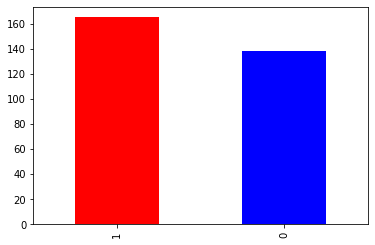

In [5]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [10]:
207/(207+96)

0.6831683168316832

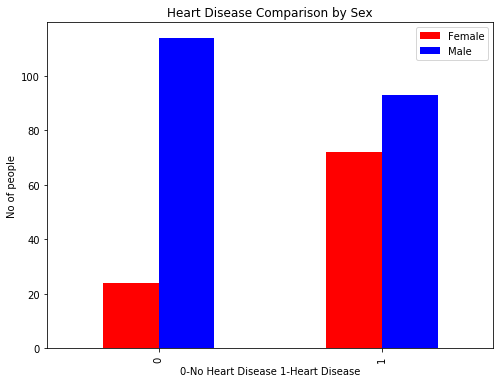

In [11]:
pd.crosstab(df.target,df.sex).plot(kind="bar",color=["red","blue"],figsize=(8,6));
plt.title("Heart Disease Comparison by Sex");
plt.xlabel("0-No Heart Disease 1-Heart Disease");
plt.ylabel("No of people");
plt.legend(["Female","Male"]);

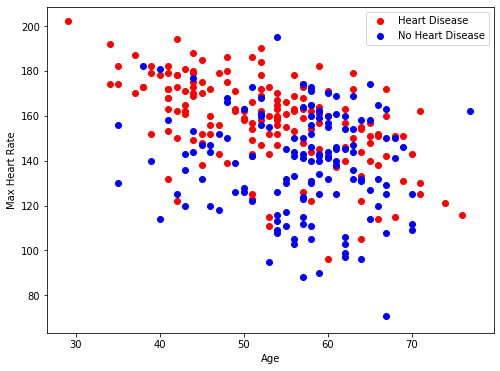

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue");
plt.xlabel("Age");
plt.ylabel("Max Heart Rate");
plt.legend(["Heart Disease","No Heart Disease"]);

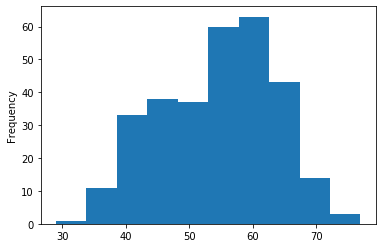

In [13]:
df.age.plot.hist();

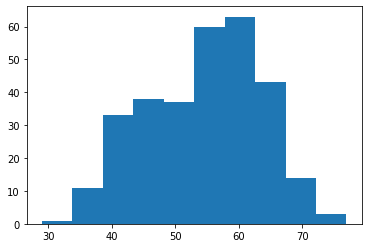

In [14]:
plt.hist(df.age);

In [15]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


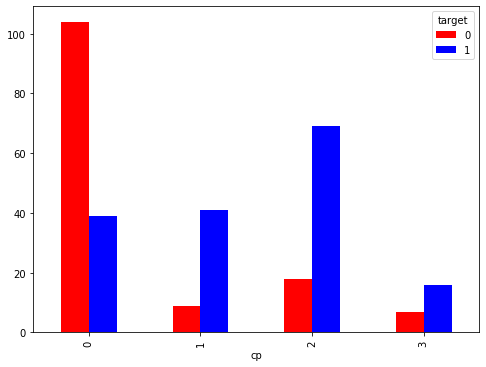

In [16]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["red","blue"],figsize=(8,6));


In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


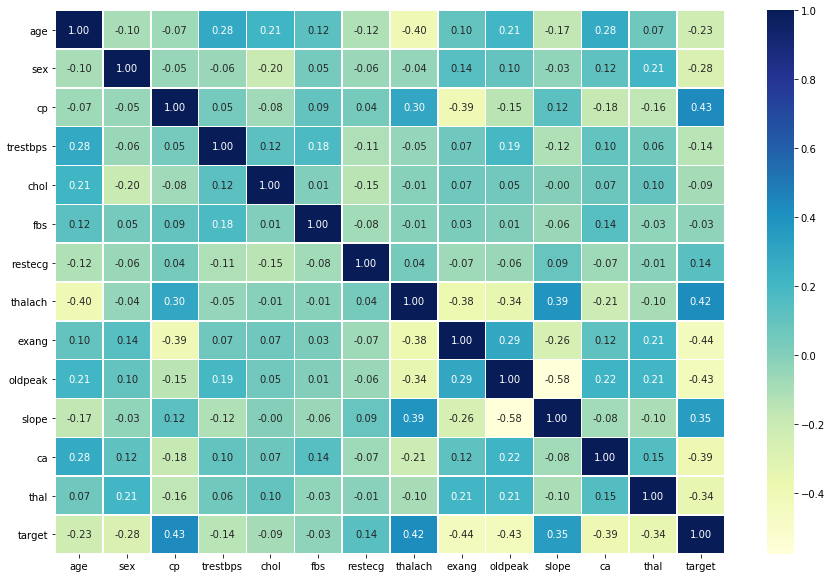

In [18]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True, linewidths=0.5, fmt=".2f",cmap="YlGnBu")

In [19]:

x=df.drop(labels="target",axis=1)
y=df["target"]

In [20]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier()}
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for i in models:
        models[i].fit(x_train,y_train)
        model_scores[i]=models[i].score(x_test,y_test)
    return model_scores
    

In [22]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [23]:
models_compare=pd.DataFrame(model_scores,index=["Score"])
models_compare
                                            

,Logistic Regression,KNN,Random Forest
Score,0.885246,0.688525,0.836066


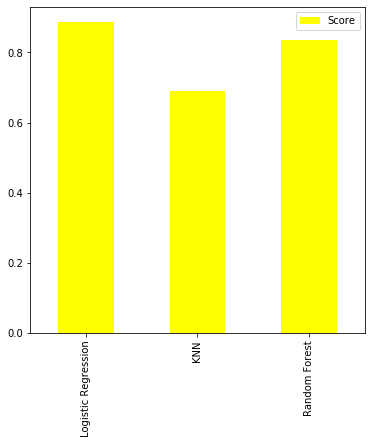

In [24]:
models_compare.T.plot(kind="bar",color="Yellow",figsize=(6,6));

In [25]:
pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [26]:
log_reg_grid={"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}
rf_grid={"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}

In [27]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [28]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [29]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

In [30]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                                verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [31]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [32]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [33]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [34]:
np.random.seed(42)
log_reg_grid={"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid,
                               cv=5,
                              verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [35]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [36]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [37]:
model_scores


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [38]:
y_preds=gs_log_reg.predict(x_test)

In [39]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [41]:
np.mean(y_preds==y_test)

0.8852459016393442

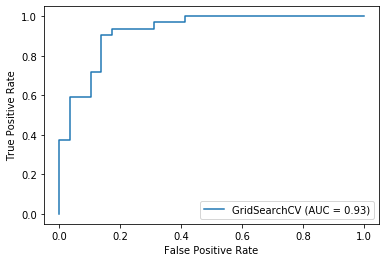

In [42]:
plot_roc_curve(gs_log_reg,x_test,y_test)

In [43]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

Text(15.0, 0.5, 'Predicted value')

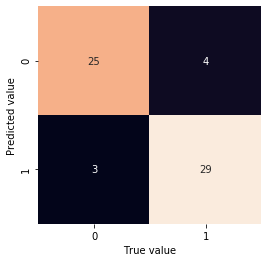

In [44]:
fig,ax=plt.subplots(figsize=(4,4))
ax=sns.heatmap(confusion_matrix(y_test,y_preds),
               annot=True,
                cbar=False)
plt.xlabel("True value")
plt.ylabel("Predicted value")


In [45]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [46]:
1+2

3

In [47]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [53]:
clf=LogisticRegression(C= 0.20433597178569418, solver="liblinear")

In [54]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [65]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [56]:
cv_pr=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_pr

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [64]:
cv_pr=np.mean(cv_pr)
cv_pr

0.8207936507936507

In [58]:
cv_re=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_re

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [62]:
cv_re=np.mean(cv_re)
cv_re

0.9212121212121213

In [60]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [63]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

In [72]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_pr,
                          "Recall":cv_re,
                           "f1":cv_f1}, index=["Score"])

In [73]:
cv_metrics

,Accuracy,Precision,Recall,f1
Score,0.844699,0.820794,0.921212,0.867301


In [75]:
cv_metrics.T

,Score
Accuracy,0.844699
Precision,0.820794
Recall,0.921212
f1,0.867301


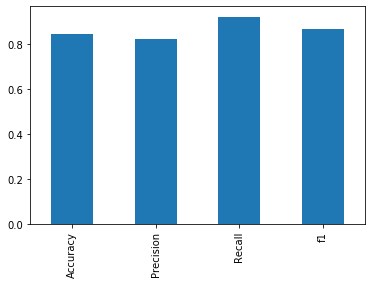

In [79]:
cv_metrics.T.plot.bar(legend=False)

In [80]:
clf=LogisticRegression(C= 0.20433597178569418, solver="liblinear")

In [81]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [85]:
info=dict(zip(df.columns,clf.coef_[0]))


In [86]:
info

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [87]:
co_tab=pd.DataFrame(info,index=["Coefficients"])
co_tab

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Coefficients,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


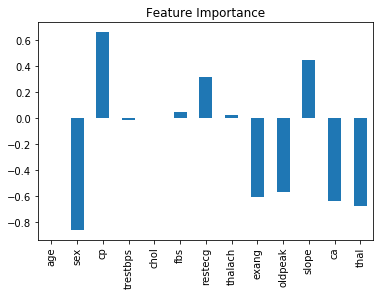

In [93]:
co_tab.T.plot.bar(title="Feature Importance",legend=False);

In [94]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
